CSC 475 Assignment 1 - Christian Knowles V00874629
This submission will attempt all minimum and expected problems

In [1]:
#importing necessary python modules
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import soundfile as sf
from matplotlib.widgets import Slider, Button, RadioButtons

In [2]:
srate = 44100.0

def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

In [3]:
#Question 1: Reversing audio
data, samplerate = sf.read('test.wav') #test wav file for manipulation
wav_file = np.array(data) #load sample data into numpy array
wav_file_reversed = wav_file[::-1] #reverse samples
sf.write('test_reversed.wav', wav_file_reversed, samplerate) #will export wav file that is reversed audio

<IPython.core.display.Javascript object>


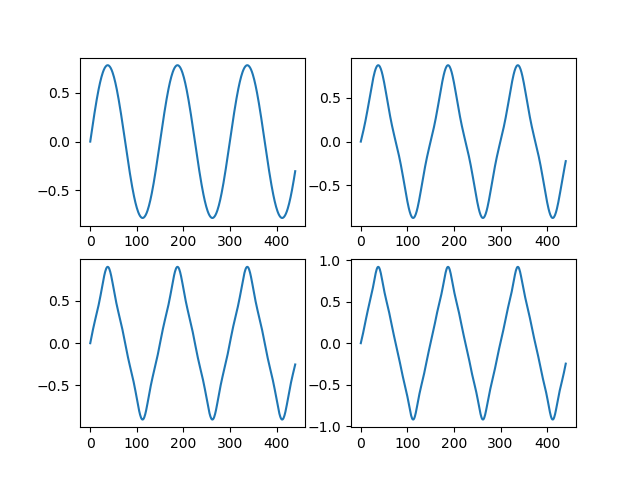

In [4]:
#Question 2: Plotting triangle waves

def noteToFreq(note):
    a = 440 #frequency of A4 (440Hz)
    return (a / 32) * (2 ** ((note - 9) / 12))

def triangle_wave(note, dur, sin_num):
    t = np.linspace(0,dur,int(srate*dur))
    freq = noteToFreq(note)
    data = 0
    for x in range(0, sin_num): #loop 
        data += ((-1)**x)*(1/((2*x+1)**2)*np.sin(2*np.pi*freq*(2*x+1) *t)) #adding odd harmonics of fundamental
    return (np.pi/4)*data


twave1 = triangle_wave(note=62, dur=0.01, sin_num=1)
twave2 = triangle_wave(note=62, dur=0.01, sin_num=2)
twave3 = triangle_wave(note=62, dur=0.01, sin_num=3)
twave4 = triangle_wave(note=62, dur=0.01, sin_num=4)
fig, ax = plt.subplots(2,2) #create four plots
ax[0,0].plot(twave1) #fundamental with no harmonics (top left)
ax[0,1].plot(twave2) #with one odd harmonic (top right)
ax[1,0].plot(twave3) #with two odd harmonics (bottom left)
ax[1,1].plot(twave4) #with three odd harmonics (bottom right)
plt.show()

In [5]:
#Question 3: Combining sinusoids and noise

sin_normal = sinusoid(freq=880.0, dur=2.0)
noise = np.random.normal(0, 1.0, len(sin_normal))
mix = sin_normal + noise
data = np.hstack([sin_normal, noise, mix]) #sine wave, then noise, then mixture
ipd.Audio(data,rate=srate)

In [6]:
#this time we combine sinusoids of different frequencies
sin_1 = sinusoid(freq=666.0, dur=2.0)
sin_2 = sinusoid(freq=696.0, dur=2.0)
mix = sin_1 + sin_2
data = np.hstack([sin_1, sin_2, mix]) #sine wave, then sinusoid of different frequency, then mixture
ipd.Audio(data,rate=srate)

Question 4 part 1: Beating equation

With the equation a1*sin(ω∗t)+a2*sin((ω+δ)∗t), we can notate the beating of two sinusoids

With a1=1.0, a2=0.8, ω=0.3157

0.3357 = 0.3157+δ

δ=0.02

beating = 1.0*sin(0.3157t)+0.8*sin((0.3157+0.02)t) = sin(0.3157t)+0.8*sin(0.3357t)

<IPython.core.display.Javascript object>


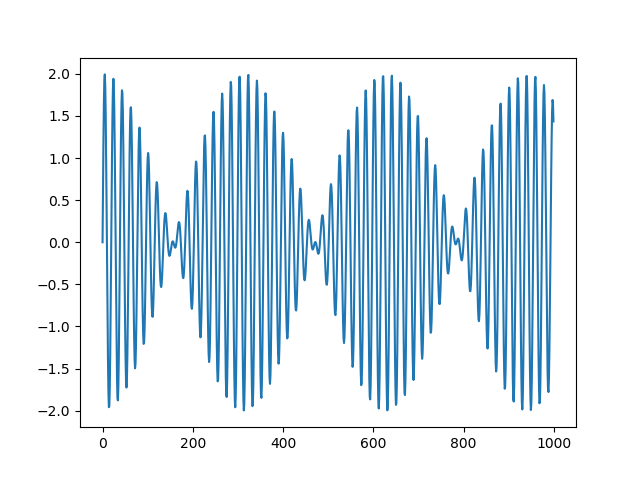

In [7]:
#Question 4 part 2: Plotting beating
sin1 = sinusoid(freq=(0.3157/(2*np.pi)),dur=1000.0, srate=1.0)
sin2 = sinusoid(freq=(0.3357/(2*np.pi)),dur=1000.0, srate=1.0)
beating = sin1 + sin2
plt.figure()
plt.plot(beating) #captures 1000 seconds of beating between these two frequencies (one point per second)
plt.show()

<IPython.core.display.Javascript object>


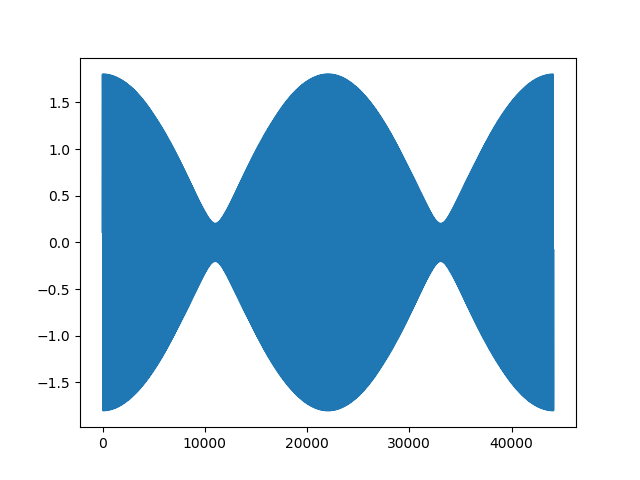

In [8]:
#Question 4 part 3: Audio of beating
sin1 = sinusoid(freq=440.0,dur=4.0,amp=1.0)
sin2 = sinusoid(freq=442.0,dur=4.0,amp=0.8)
beating = sin1 + sin2
plt.figure()
plt.plot(beating[1:44100]) #captures one second of beating audio (zoom in to see waveform)
plt.show()
ipd.Audio(beating, rate=srate)